# Microearthquake Catalog Data Analysis and Total Events Calculation

### By Geophysics Team PT Supreme Energy

Notebook ini berisikan analisis data secara deskriptif dan visualisasi dari data microearthquake (MEQ) yang telah diperoleh melalui proses pengolahan, dari raw data hasil akuisisi lapangan hingga perhitungan magnitudo. Analisis data diperlukan untuk menemukan pola dan wawasan dari fitur-fitur yang tersedia. Adapun pada notebook ini berisikan perhitungan total event gempa mikro secara temporal yang diekstrak dari catalog untuk kebutuhan interpretasi gabungan dengan data subsurface lainnya. 

### Data Understanding

| Attribute | Description |
| --- | --- |
| ID | ID data dari gempa mikro yang terekam|
| Lat | Koordinat garis lintang dari gempa mikro |
| Lon | Koordinat garis bujur dari gempa mikro |
| UTM X (m) | Koordinat timur (easting) dari kejadian gempa mikro dalam sistem UTM |
| UTM Y (m) | Koordinat utara (northing) dari kejadian gempa mikro dalam sistem UTM |
| Depth (m) | Kedalaman gempa mikro dalam meter, kedalaman akan bernilai negatif jika diatas permukaan laut |
| Elev (m) | Ketinggian gempa mikro dalam meter, elevasi akan bernilai negatif jka dibawah permukaan |
| Year | Tahun dimana gempa mikro dalam satu ID terekam |
| Month | Bulan dimana gempa mikro dalam satu ID terekam |
| Day | Hari dimana gempa mikro dalam satu ID terekam |
| Hour | Jam dimana gempa mikro dalam satu ID terekam |
| Minute | Menit dimana gempa mikro dalam satu ID terekam |
| OT(sec) | Detik dimana gempa mikro dalam satu ID terekam |
| RMS error | Nilai root mean square error dari pengolahan data untuk satu ID gempa mikro |
| Kolom1 | Pembatas antara data sebelum dan sesudah relokasi menggunakan hypoDD |
| ID DD | ID data dari gempa mikro yang terekam hasil pengolahan hypoDD|
| Lat DD | Koordinat garis lintang dari gempa mikro hasil pengolahan hypoDD |
| Lon DD | Koordinat garis bujur dari gempa mikro hasil pengolahan hypoDD |
| UTM X (m) DD | Koordinat timur (easting) dari kejadian gempa mikro dalam sistem UTM hasil pengolahan hypoDD |
| UTM Y (m) DD | Koordinat utara (northing) dari kejadian gempa mikro dalam sistem UTM hasil pengolahan hypoDD |
| Depth (m) DD | Kedalaman gempa mikro dalam meter hasil pengolahan hypoDD, kedalaman akan bernilai negatif jika diatas permukaan laut |
| Elev (m) DD | Ketinggian gempa mikro dalam meter hasil pengolahan hypoDD , elevasi akan bernilai negatif jka dibawah permukaan |
| Year DD | Tahun dimana gempa mikro dalam satu ID terekam setelah melalui proses hypoDD |
| Month DD | Bulan dimana gempa mikro dalam satu ID terekam setelah melalui proses hypoDD |
| Day DD | Hari dimana gempa mikro dalam satu ID terekam setelah melalui proses hypoDD |
| Hour DD | Jam dimana gempa mikro dalam satu ID terekam setelah melalui proses hypoDD |
| Minute DD | Menit dimana gempa mikro dalam satu ID terekam setelah melalui proses hypoDD |
| OT(sec) DD | Detik dimana gempa mikro dalam satu ID terekam setelah melalui proses hypoDD |
| RMS error DD | Nilai root mean square error dari pengolahan data untuk satu ID gempa mikro melalui proses hypoDD |
| Remarks | Keterangan jenis gempa mikro; inisial atau relokasi |
| Ml Magnitude | Nilai lokal magnitudo |
| Mw Magnitude | Nilai momen magnitudo |

#### Libraries Set Up 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
import missingno
import plotly.graph_objects as go

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from scipy.stats import normaltest
from sklearn.impute import SimpleImputer

### Data Loading

Data MEQ setelah melalui proses hypoDD dan estimasi magnitudo bisa digunakan sebagai input untuk analisis data dengan pendekatan statistik.

In [2]:
# Membaca data dari file Excel
df = pd.read_excel('MEQ Catalog.xlsx') 
df

ID       Lat         Lon   UTM X (m)    UTM Y (m)  Depth (m)  Elev (m)  \
0    2001 -1.598386  101.162896  740640.625  9823203.125   -890.625   890.625   
1    2005 -1.639367  101.149183  739109.375  9818671.875    953.125  -953.125   
2    2014 -1.577068  101.150942  739312.500  9825562.500   6687.500 -6687.500   
3    2016 -1.650112  101.140772  738171.875  9817484.375   1171.875 -1171.875   
4    2019 -1.638524  101.144971  738640.625  9818765.625    796.875  -796.875   
..    ...       ...         ...         ...          ...        ...       ...   
874  3265 -1.641144  101.138306  737898.438  9818476.562    710.938  -710.938   
875  3266 -1.640861  101.139288  738007.812  9818507.812    601.562  -601.562   
876  3267 -1.640437  101.139147  737992.188  9818554.688    835.938  -835.938   
877  3268 -1.642549  101.145747  738726.562  9818320.312    320.312  -320.312   
878  3269 -1.640517  101.130935  737078.125  9818546.875    796.875  -796.875   

     Year  Month  Day  ...  Year DD  Month DD  Day DD  Hour DD  Minute DD  \
0    2020     12   13  ...     2020        12      13       14         57   
1    2020     12   23  ...     2020        12      23       17         20   
2    2020     12   30  ...     2020        12      30       15          3   
3    2021      1    2  ...     2021         1       2       12         52   
4    2021      1    5  ...     2021         1       5       16          8   
..    ...    ...  ...  ...      ...       ...     ...      ...        ...   
874  2023      9   28  ...     2023         9      28        8         59   
875  2023      9   28  ...     2023         9      28        9          4   
876  2023      9   28  ...     2023         9      28        9          5   
877  2023      9   28  ...     2023         9      28        9         10   
878  2023      9   28  ...     2023         9      28        9         17   

     OT(sec) DD  RMS error DD  Remarks  Ml Magnitude  Mw Magnitude  
0     47.844215      0.023990  Initial           NaN           NaN  
1     54.520001      0.022201    Reloc           NaN           NaN  
2     30.640550      0.071077  Initial           NaN           NaN  
3      3.690000      0.028875    Reloc           NaN           NaN  
4     57.660000      0.025909    Reloc           NaN           NaN  
..          ...           ...      ...           ...           ...  
874   46.540001      0.033231    Reloc        -0.440         0.033  
875   21.280001      0.030113    Reloc        -0.458        -0.011  
876   15.860000      0.030224    Reloc        -0.379         0.054  
877   20.379999      0.029736    Reloc         0.961         0.873  
878   17.400000      0.030270    Reloc        -0.775        -0.171  

[879 rows x 32 columns]

In [3]:
df.columns

Index(['ID', 'Lat', 'Lon', 'UTM X (m)', 'UTM Y (m)', 'Depth (m)', 'Elev (m)',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'OT(sec)', 'RMS error',
       'Kolom1', 'ID DD', 'Lat DD', 'Lon DD', 'UTM X (m) DD', 'UTM Y (m) DD',
       'Depth (m) DD', 'Elev (m) DD', 'Year DD', 'Month DD', 'Day DD',
       'Hour DD', 'Minute DD', 'OT(sec) DD', 'RMS error DD', 'Remarks',
       'Ml Magnitude', 'Mw Magnitude'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            879 non-null    int64  
 1   Lat           879 non-null    float64
 2   Lon           879 non-null    float64
 3   UTM X (m)     879 non-null    float64
 4   UTM Y (m)     879 non-null    float64
 5   Depth (m)     879 non-null    float64
 6   Elev (m)      879 non-null    float64
 7   Year          879 non-null    int64  
 8   Month         879 non-null    int64  
 9   Day           879 non-null    int64  
 10  Hour          879 non-null    int64  
 11  Minute        879 non-null    int64  
 12  OT(sec)       879 non-null    float64
 13  RMS error     879 non-null    float64
 14  Kolom1        0 non-null      float64
 15  ID DD         879 non-null    int64  
 16  Lat DD        879 non-null    float64
 17  Lon DD        879 non-null    float64
 18  UTM X (m) DD  879 non-null    

* Dapat Dilihat bahwa katalog MEQ dari 13-12-2020 hingga 28-9-2023 memiliki 32 kolom dan 879 baris dan terdiri dari 31 kolom bertipe numerik dan 1 kolom bertipe kategorikal.
* Katalog MEQ akan terus di-update secara temporal jika terjadi penambahan jumlah gempa mikro yang teridentifikasi, menyebabkan baris pada dataset akan terus bertambah.

### Statistik Deskriptif

In [5]:
df['RMS error'].describe()

count    879.000000
mean       0.033763
std        0.021637
min        0.000096
25%        0.020895
50%        0.030456
75%        0.041478
max        0.251016
Name: RMS error, dtype: float64

In [6]:
df['RMS error DD'].describe()

count    879.000000
mean       0.033526
std        0.020473
min        0.000096
25%        0.025558
50%        0.030697
75%        0.034804
max        0.251016
Name: RMS error DD, dtype: float64

* Terjadi penurunan rata-rata RMS error setelah melalui proses hypoDD meski tidak begitu signifikan dari 0.033763 ke 0.033526

In [7]:
df['Ml Magnitude'].describe()

count    666.000000
mean      -0.207784
std        0.590692
min       -1.454000
25%       -0.640250
50%       -0.310500
75%        0.092500
max        2.934000
Name: Ml Magnitude, dtype: float64

In [8]:
df['Mw Magnitude'].describe()

count    666.000000
mean       0.206859
std        0.394913
min       -0.509000
25%       -0.070750
50%        0.131500
75%        0.423750
max        2.262000
Name: Mw Magnitude, dtype: float64

* Berdasarkan nilai maksimum dari lokal dan momen magnitude, semua gelombang seismik yang terekam merupakan gempa-gempa mikro karena memiliki magnitudo lebih kecil dari 3. 
* Lokal magnitude paling besar yakni sebesar 2.934 dan momen magnitude paling besar yakni bernilai 2.262
* Gempa mikro muncul bisa diakibatkan oleh kegiatan produksi lapangan geotermal, injeksi fluida, kegiatan pengeboran, dan lainnya. 

### Identifikasi dan Penanganan Nilai yang Hilang (Identification and Handling Missing Value)

<Axes: >

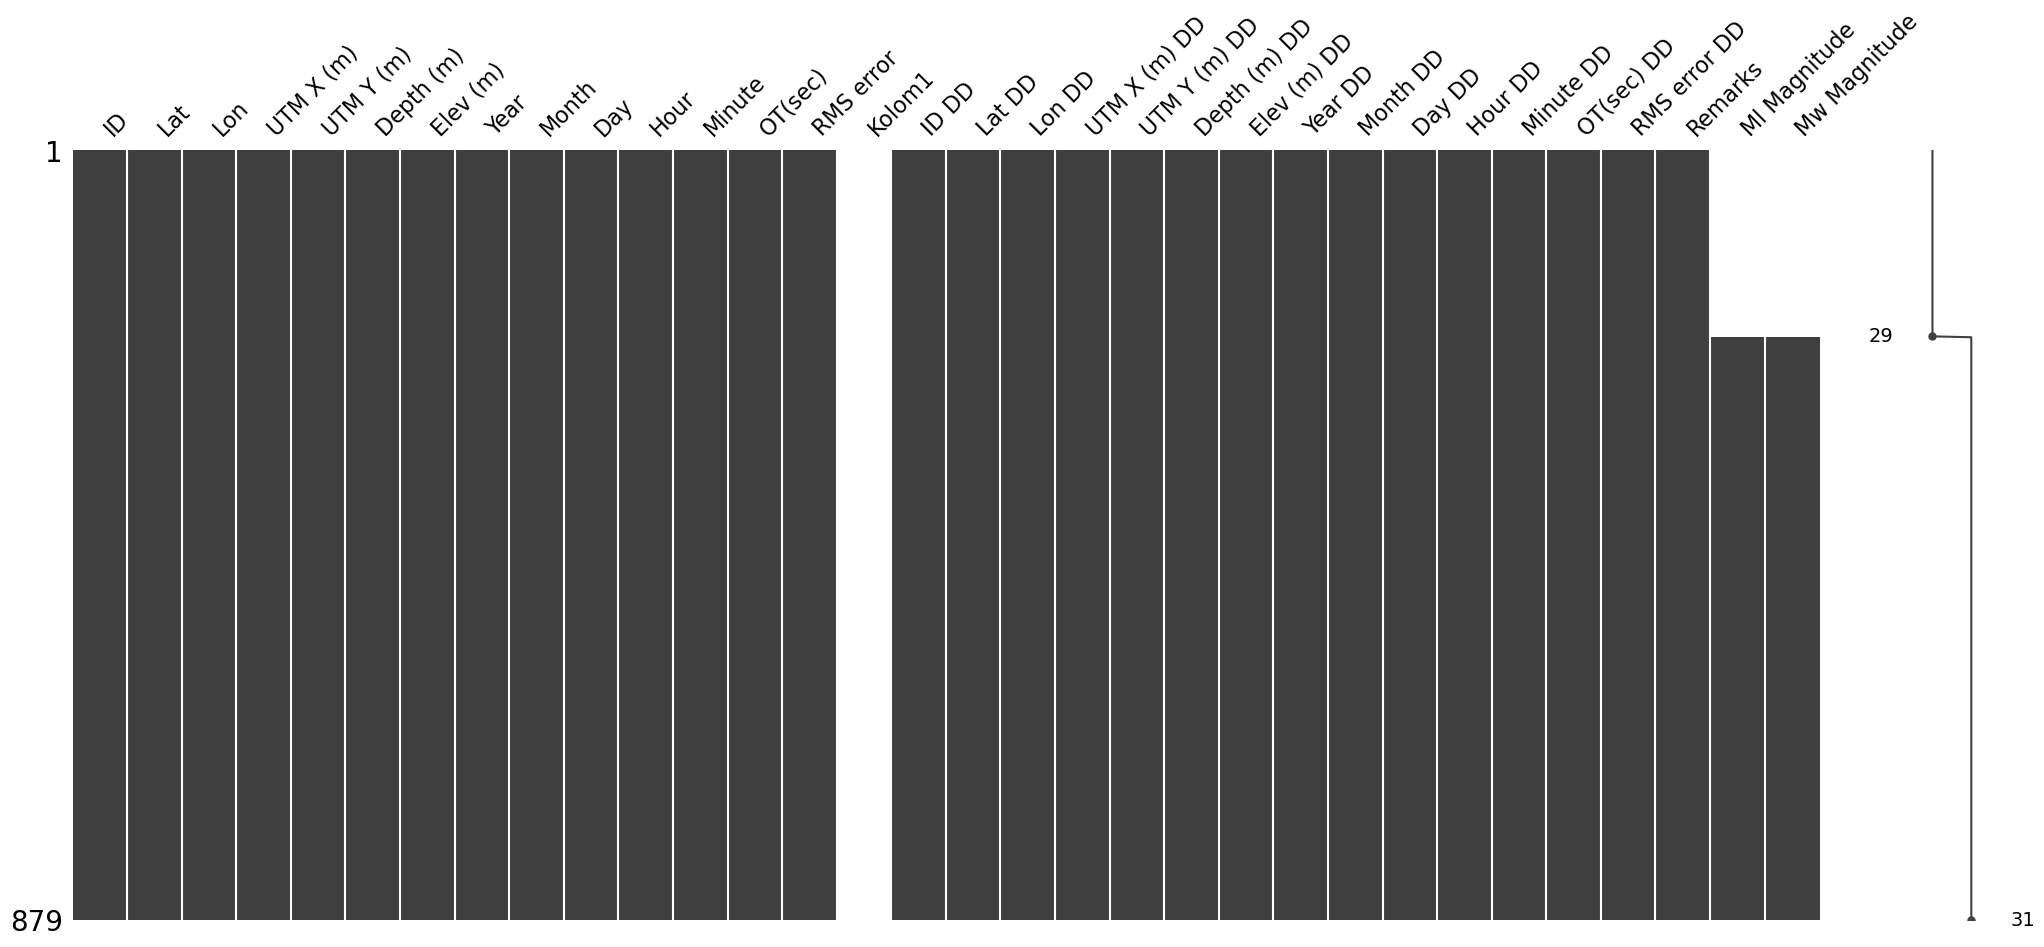

In [9]:
missingno.matrix(df)

In [10]:
df.isna().sum()/df.shape[0]*100

ID                0.000000
Lat               0.000000
Lon               0.000000
UTM X (m)         0.000000
UTM Y (m)         0.000000
Depth (m)         0.000000
Elev (m)          0.000000
Year              0.000000
Month             0.000000
Day               0.000000
Hour              0.000000
Minute            0.000000
OT(sec)           0.000000
RMS error         0.000000
Kolom1          100.000000
ID DD             0.000000
Lat DD            0.000000
Lon DD            0.000000
UTM X (m) DD      0.000000
UTM Y (m) DD      0.000000
Depth (m) DD      0.000000
Elev (m) DD       0.000000
Year DD           0.000000
Month DD          0.000000
Day DD            0.000000
Hour DD           0.000000
Minute DD         0.000000
OT(sec) DD        0.000000
RMS error DD      0.000000
Remarks           0.000000
Ml Magnitude     24.232082
Mw Magnitude     24.232082
dtype: float64

* Karena input data katalog memiliki template pada format excell, terdapat 1 kolom yang memisahkan pengolahan data sebelum dan sesudah HypoDD yang bernama 'Kolom1', sehingga kolom ini dapat dihilangkan.
* Terdapat missing value pada kolom lokal dan momen magnitudo dari tanggal 13-12-2020 hingga 27-04-2022. Didalam analisis data secara statistik tidak diperbolehkan adanya nilai yang hilang (missing value) karena akan menyebabkan error pada visualisasi data, dan jika seluruh missing value di drop maka akan berakibat pada kehilangan data sebesar 24.23% atau dengan kata lain kehilangan 200 lebih data pada tahun 2020 hingga 2021 untuk dianalisis. Maka dari itu, untuk kebutuhan data analisis dengan pendekatan statistik, missing value perlu diisi, akan tetapi perlu dicek terlebih dahulu karakteristik distribusi datanya, jika tidak terdistribusi normal maka pengisian value yang hilang akan dilakukan dengan menggunakan median.

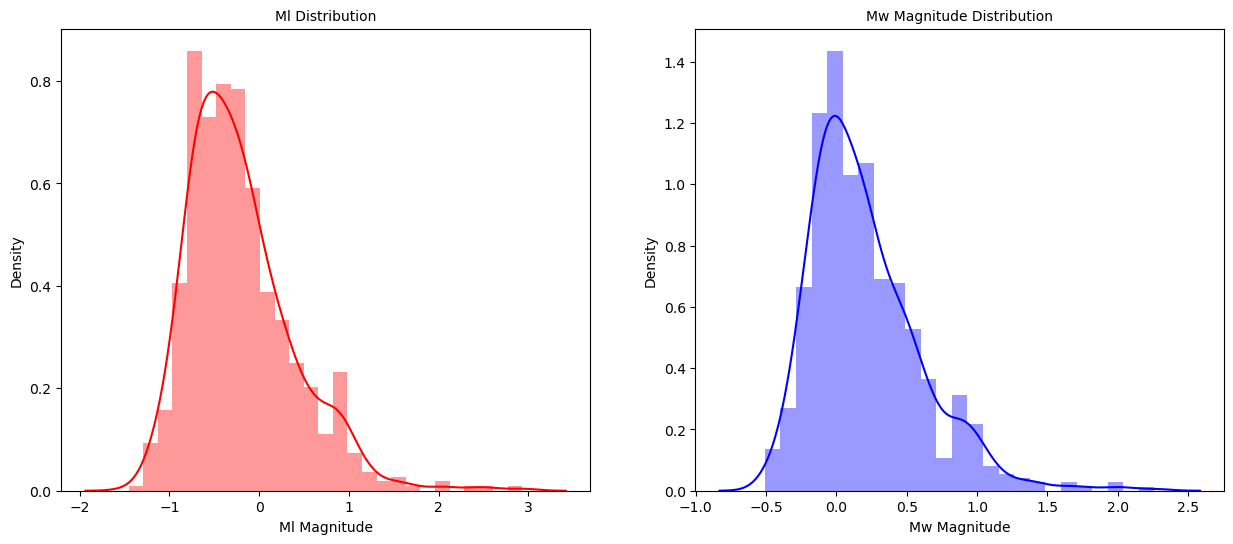

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

sns.distplot(df['Ml Magnitude'], color='red', ax=axs[0])
axs[0].set_title('Ml Distribution', size=10)

sns.distplot(df['Mw Magnitude'], color='blue', ax=axs[1])
axs[1].set_title('Mw Magnitude Distribution', size=10)

plt.show()

* Dari plot distribusi untuk fitur lokal dan momen magnitude dapat dilihat memiliki distribusi yang tidak normal, sehingga pengisian value yang hilang akan dilakukan dengan mengisi nilai mediannya.

In [12]:
# Mengisi nilai yang hilang dengan median
df['Ml Magnitude'] = df['Ml Magnitude'].fillna(df['Ml Magnitude'].median())
df['Mw Magnitude'] = df['Mw Magnitude'].fillna(df['Mw Magnitude'].median())

In [13]:
df

ID       Lat         Lon   UTM X (m)    UTM Y (m)  Depth (m)  Elev (m)  \
0    2001 -1.598386  101.162896  740640.625  9823203.125   -890.625   890.625   
1    2005 -1.639367  101.149183  739109.375  9818671.875    953.125  -953.125   
2    2014 -1.577068  101.150942  739312.500  9825562.500   6687.500 -6687.500   
3    2016 -1.650112  101.140772  738171.875  9817484.375   1171.875 -1171.875   
4    2019 -1.638524  101.144971  738640.625  9818765.625    796.875  -796.875   
..    ...       ...         ...         ...          ...        ...       ...   
874  3265 -1.641144  101.138306  737898.438  9818476.562    710.938  -710.938   
875  3266 -1.640861  101.139288  738007.812  9818507.812    601.562  -601.562   
876  3267 -1.640437  101.139147  737992.188  9818554.688    835.938  -835.938   
877  3268 -1.642549  101.145747  738726.562  9818320.312    320.312  -320.312   
878  3269 -1.640517  101.130935  737078.125  9818546.875    796.875  -796.875   

     Year  Month  Day  ...  Year DD  Month DD  Day DD  Hour DD  Minute DD  \
0    2020     12   13  ...     2020        12      13       14         57   
1    2020     12   23  ...     2020        12      23       17         20   
2    2020     12   30  ...     2020        12      30       15          3   
3    2021      1    2  ...     2021         1       2       12         52   
4    2021      1    5  ...     2021         1       5       16          8   
..    ...    ...  ...  ...      ...       ...     ...      ...        ...   
874  2023      9   28  ...     2023         9      28        8         59   
875  2023      9   28  ...     2023         9      28        9          4   
876  2023      9   28  ...     2023         9      28        9          5   
877  2023      9   28  ...     2023         9      28        9         10   
878  2023      9   28  ...     2023         9      28        9         17   

     OT(sec) DD  RMS error DD  Remarks  Ml Magnitude  Mw Magnitude  
0     47.844215      0.023990  Initial       -0.3105        0.1315  
1     54.520001      0.022201    Reloc       -0.3105        0.1315  
2     30.640550      0.071077  Initial       -0.3105        0.1315  
3      3.690000      0.028875    Reloc       -0.3105        0.1315  
4     57.660000      0.025909    Reloc       -0.3105        0.1315  
..          ...           ...      ...           ...           ...  
874   46.540001      0.033231    Reloc       -0.4400        0.0330  
875   21.280001      0.030113    Reloc       -0.4580       -0.0110  
876   15.860000      0.030224    Reloc       -0.3790        0.0540  
877   20.379999      0.029736    Reloc        0.9610        0.8730  
878   17.400000      0.030270    Reloc       -0.7750       -0.1710  

[879 rows x 32 columns]

In [14]:
data_drop = ['Kolom1']
df = df.drop(data_drop, axis=1)

Karena data memiliki fitur tahun, bulan, dan hari yang terpisah sehingga bisa diperoleh satu fitur baru yang merepresentasikan tanggal yang akan berguna untuk kebutuhan plot temporal.

In [15]:
# Buat kolom 'date'
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Tampilkan DataFrame
df

ID       Lat         Lon   UTM X (m)    UTM Y (m)  Depth (m)  Elev (m)  \
0    2001 -1.598386  101.162896  740640.625  9823203.125   -890.625   890.625   
1    2005 -1.639367  101.149183  739109.375  9818671.875    953.125  -953.125   
2    2014 -1.577068  101.150942  739312.500  9825562.500   6687.500 -6687.500   
3    2016 -1.650112  101.140772  738171.875  9817484.375   1171.875 -1171.875   
4    2019 -1.638524  101.144971  738640.625  9818765.625    796.875  -796.875   
..    ...       ...         ...         ...          ...        ...       ...   
874  3265 -1.641144  101.138306  737898.438  9818476.562    710.938  -710.938   
875  3266 -1.640861  101.139288  738007.812  9818507.812    601.562  -601.562   
876  3267 -1.640437  101.139147  737992.188  9818554.688    835.938  -835.938   
877  3268 -1.642549  101.145747  738726.562  9818320.312    320.312  -320.312   
878  3269 -1.640517  101.130935  737078.125  9818546.875    796.875  -796.875   

     Year  Month  Day  ...  Month DD  Day DD  Hour DD  Minute DD  OT(sec) DD  \
0    2020     12   13  ...        12      13       14         57   47.844215   
1    2020     12   23  ...        12      23       17         20   54.520001   
2    2020     12   30  ...        12      30       15          3   30.640550   
3    2021      1    2  ...         1       2       12         52    3.690000   
4    2021      1    5  ...         1       5       16          8   57.660000   
..    ...    ...  ...  ...       ...     ...      ...        ...         ...   
874  2023      9   28  ...         9      28        8         59   46.540001   
875  2023      9   28  ...         9      28        9          4   21.280001   
876  2023      9   28  ...         9      28        9          5   15.860000   
877  2023      9   28  ...         9      28        9         10   20.379999   
878  2023      9   28  ...         9      28        9         17   17.400000   

     RMS error DD  Remarks  Ml Magnitude  Mw Magnitude       date  
0        0.023990  Initial       -0.3105        0.1315 2020-12-13  
1        0.022201    Reloc       -0.3105        0.1315 2020-12-23  
2        0.071077  Initial       -0.3105        0.1315 2020-12-30  
3        0.028875    Reloc       -0.3105        0.1315 2021-01-02  
4        0.025909    Reloc       -0.3105        0.1315 2021-01-05  
..            ...      ...           ...           ...        ...  
874      0.033231    Reloc       -0.4400        0.0330 2023-09-28  
875      0.030113    Reloc       -0.4580       -0.0110 2023-09-28  
876      0.030224    Reloc       -0.3790        0.0540 2023-09-28  
877      0.029736    Reloc        0.9610        0.8730 2023-09-28  
878      0.030270    Reloc       -0.7750       -0.1710 2023-09-28  

[879 rows x 32 columns]

In [16]:
df.describe(include=['O'])

Remarks
count      879
unique       2
top      Reloc
freq       665

* Untuk satu-satunya fitur yang bersifat kategorikal, dapat terlihat didominasi oleh event gempa mikro yang telah direlokasi

In [17]:
df['Remarks'].value_counts()

Reloc      665
Initial    214
Name: Remarks, dtype: int64

In [18]:
df['date'].value_counts()

2023-01-20    89
2023-09-14    77
2023-09-28    57
2023-06-06    51
2023-07-19    50
              ..
2022-03-10     1
2022-03-13     1
2022-03-21     1
2022-03-30     1
2022-05-14     1
Name: date, Length: 221, dtype: int64

Informasi dari pengulangan data pada fitur tanggal secara tidak langsung menunjukan ada berapa kali event gempa mikro yang terjadi ditanggal tertentu. Maka dari itu informasi ini bisa berguna untuk menghitung berapa total event gempa mikro hariannya dan akan dibahas secara detail di bagian 'Total Events Calculation Overtime'

# Microearthquake Exploratory Data Analysis 

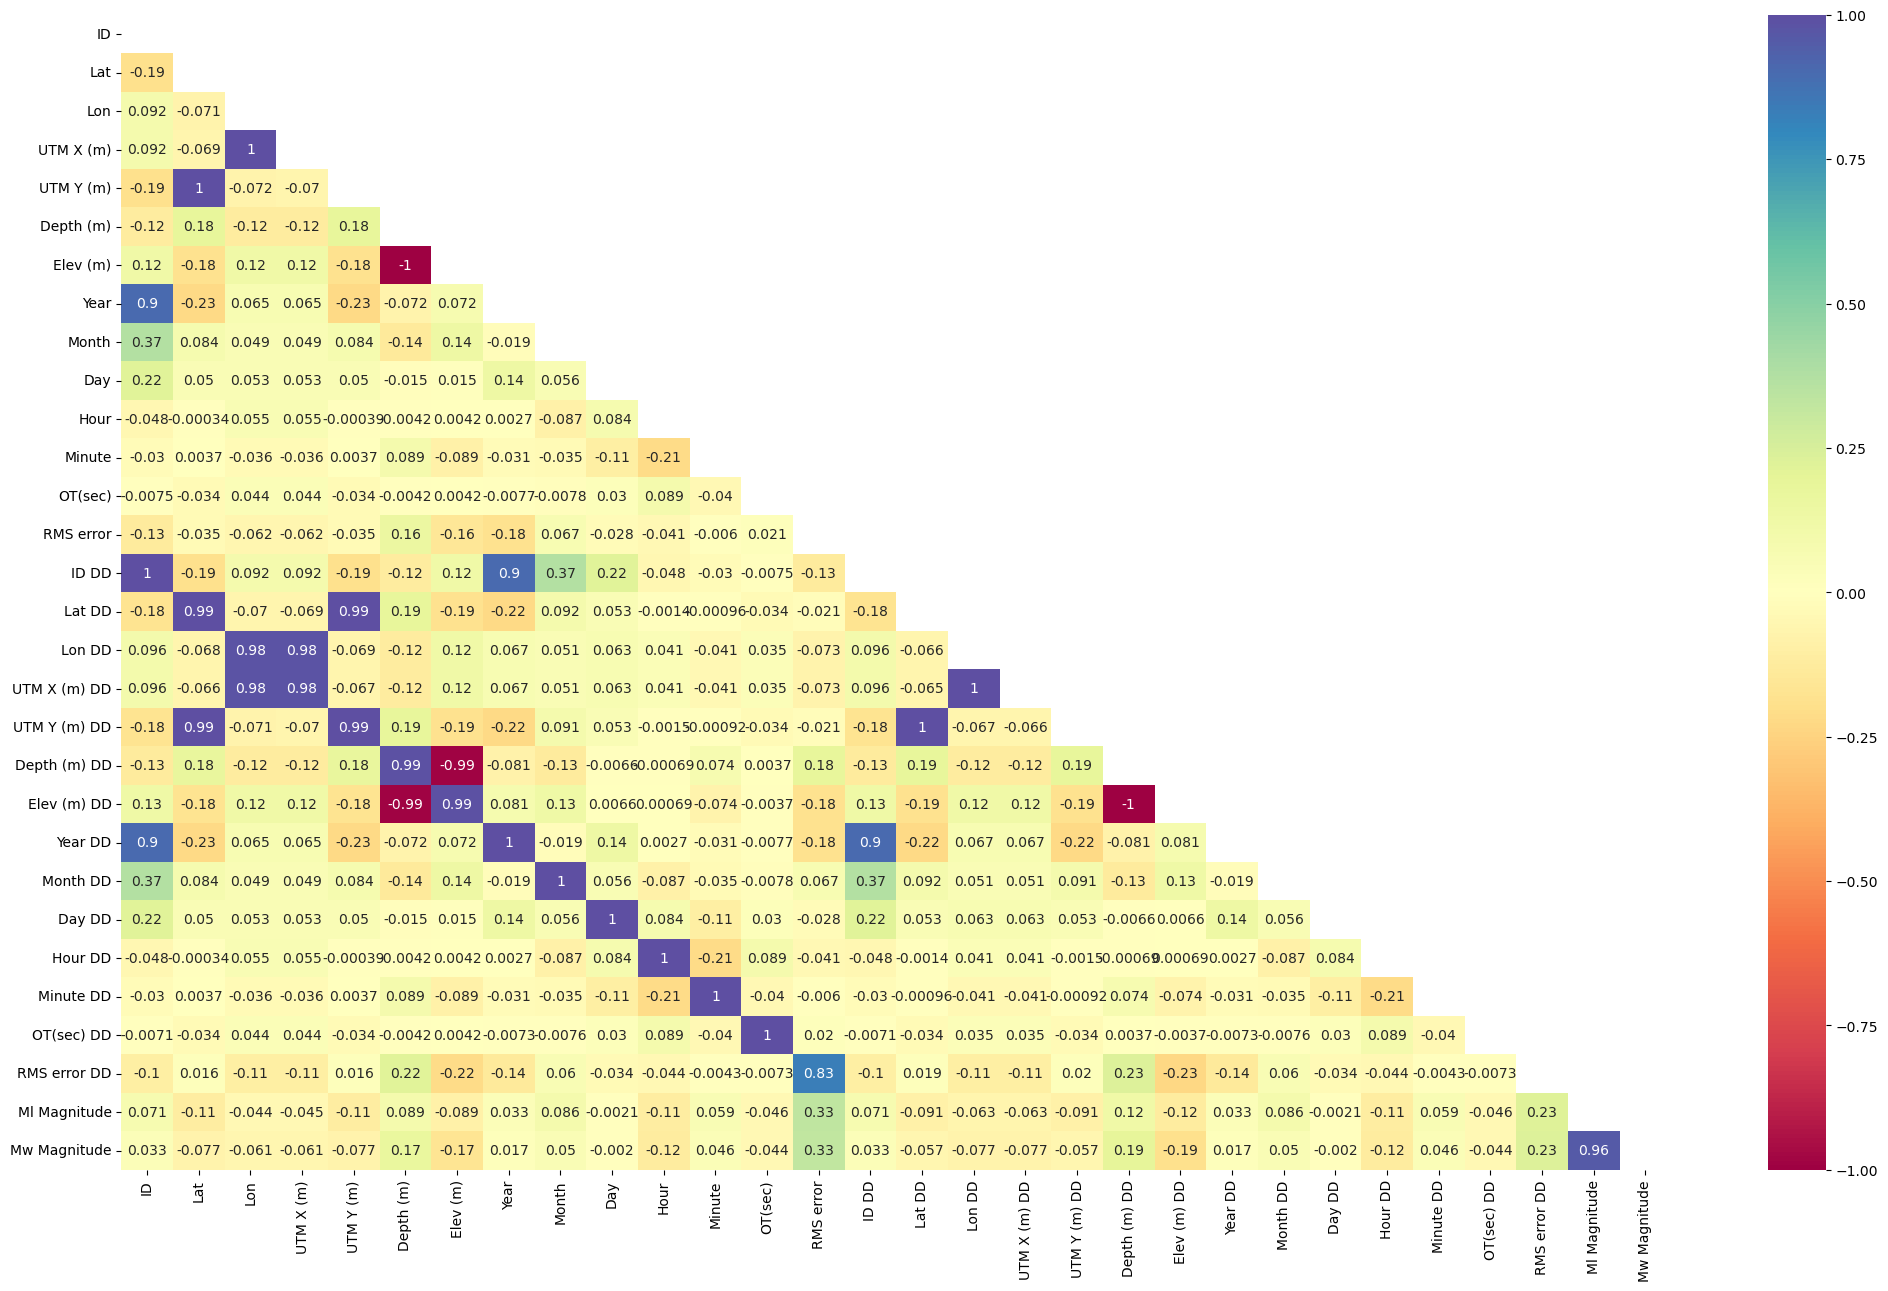

In [19]:
corrmat = df.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(25,15))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

* Dari plot korelasi pearson terlihat banyak sekali fitur-fitur pada dataset yang memiliki korelasi sempurna dimana memiliki value 1. Mencegah keberadaan fitur berulang karena merepresentasikan hal yang sama, maka salah satu dari fitur yang memiliki korelasi sempurna tersebut akan di drop. 
* Untuk data analisis, kedepannya akan digunakan sistem koordinat UTM sehingga fitur lat long bisa di drop
* Koordinat gempa mikro dalam UTM hasil DD dan koordinat gempa mikro dalam UTM sebelum DD hampir memiliki korelasi sebesar 1, sehingga teridentifikasi ada sedikitnya koordinat UTM hasil DD yang berbeda dengan UTM sebelum DD, sehingga fitur koordinat UTM sebelum dan setelah DD akan dipertahankan
* Meskipun fitur depth dan elevasi memiliki korelasi sebesar -1, kedua fitur ini dipertahankan karena kebutuhan untuk melakukan plot depth atau elevasi pada sumbu-y
* Kedalaman dan elevasi gempa mikro hasil DD dan sebelum DD hampir memiliki korelasi sebesar -1, sehingga teridentifikasi ada sedikitnya kedalaman dan elevasi hasil DD yang berbeda dengan kedalaman dan elevasi sebelum DD, sehingga fitur kedalaman dan elevasi sebelum dan setelah DD akan dipertahankan

In [20]:
data_drop = ['Lat','Lon','ID DD','Year DD','Month DD','Day DD','Hour DD','Minute DD','OT(sec) DD','Lat DD','Lon DD']
df = df.drop(data_drop, axis=1)
df

ID   UTM X (m)    UTM Y (m)  Depth (m)  Elev (m)  Year  Month  Day  \
0    2001  740640.625  9823203.125   -890.625   890.625  2020     12   13   
1    2005  739109.375  9818671.875    953.125  -953.125  2020     12   23   
2    2014  739312.500  9825562.500   6687.500 -6687.500  2020     12   30   
3    2016  738171.875  9817484.375   1171.875 -1171.875  2021      1    2   
4    2019  738640.625  9818765.625    796.875  -796.875  2021      1    5   
..    ...         ...          ...        ...       ...   ...    ...  ...   
874  3265  737898.438  9818476.562    710.938  -710.938  2023      9   28   
875  3266  738007.812  9818507.812    601.562  -601.562  2023      9   28   
876  3267  737992.188  9818554.688    835.938  -835.938  2023      9   28   
877  3268  738726.562  9818320.312    320.312  -320.312  2023      9   28   
878  3269  737078.125  9818546.875    796.875  -796.875  2023      9   28   

     Hour  Minute  ...  RMS error   UTM X (m) DD  UTM Y (m) DD  Depth (m) DD  \
0      14      57  ...   0.023990  740640.625000  9.823203e+06      -890.625   
1      17      20  ...   0.015065  739461.075875  9.818541e+06       885.150   
2      15       3  ...   0.071077  739312.500000  9.825562e+06      6687.500   
3      12      52  ...   0.041853  737382.640583  9.817259e+06       798.500   
4      16       8  ...   0.037224  738704.449598  9.818306e+06       781.510   
..    ...     ...  ...        ...            ...           ...           ...   
874     8      59  ...   0.034133  737964.529684  9.818440e+06       756.220   
875     9       4  ...   0.020449  738204.621766  9.818483e+06       546.530   
876     9       5  ...   0.026383  738120.332049  9.818435e+06       725.260   
877     9      10  ...   0.026377  738668.220248  9.818307e+06       477.460   
878     9      17  ...   0.020064  736823.880733  9.818227e+06       588.930   

     Elev (m) DD  RMS error DD  Remarks Ml Magnitude  Mw Magnitude       date  
0        890.625      0.023990  Initial      -0.3105        0.1315 2020-12-13  
1       -885.150      0.022201    Reloc      -0.3105        0.1315 2020-12-23  
2      -6687.500      0.071077  Initial      -0.3105        0.1315 2020-12-30  
3       -798.500      0.028875    Reloc      -0.3105        0.1315 2021-01-02  
4       -781.510      0.025909    Reloc      -0.3105        0.1315 2021-01-05  
..           ...           ...      ...          ...           ...        ...  
874     -756.220      0.033231    Reloc      -0.4400        0.0330 2023-09-28  
875     -546.530      0.030113    Reloc      -0.4580       -0.0110 2023-09-28  
876     -725.260      0.030224    Reloc      -0.3790        0.0540 2023-09-28  
877     -477.460      0.029736    Reloc       0.9610        0.8730 2023-09-28  
878     -588.930      0.030270    Reloc      -0.7750       -0.1710 2023-09-28  

[879 rows x 21 columns]

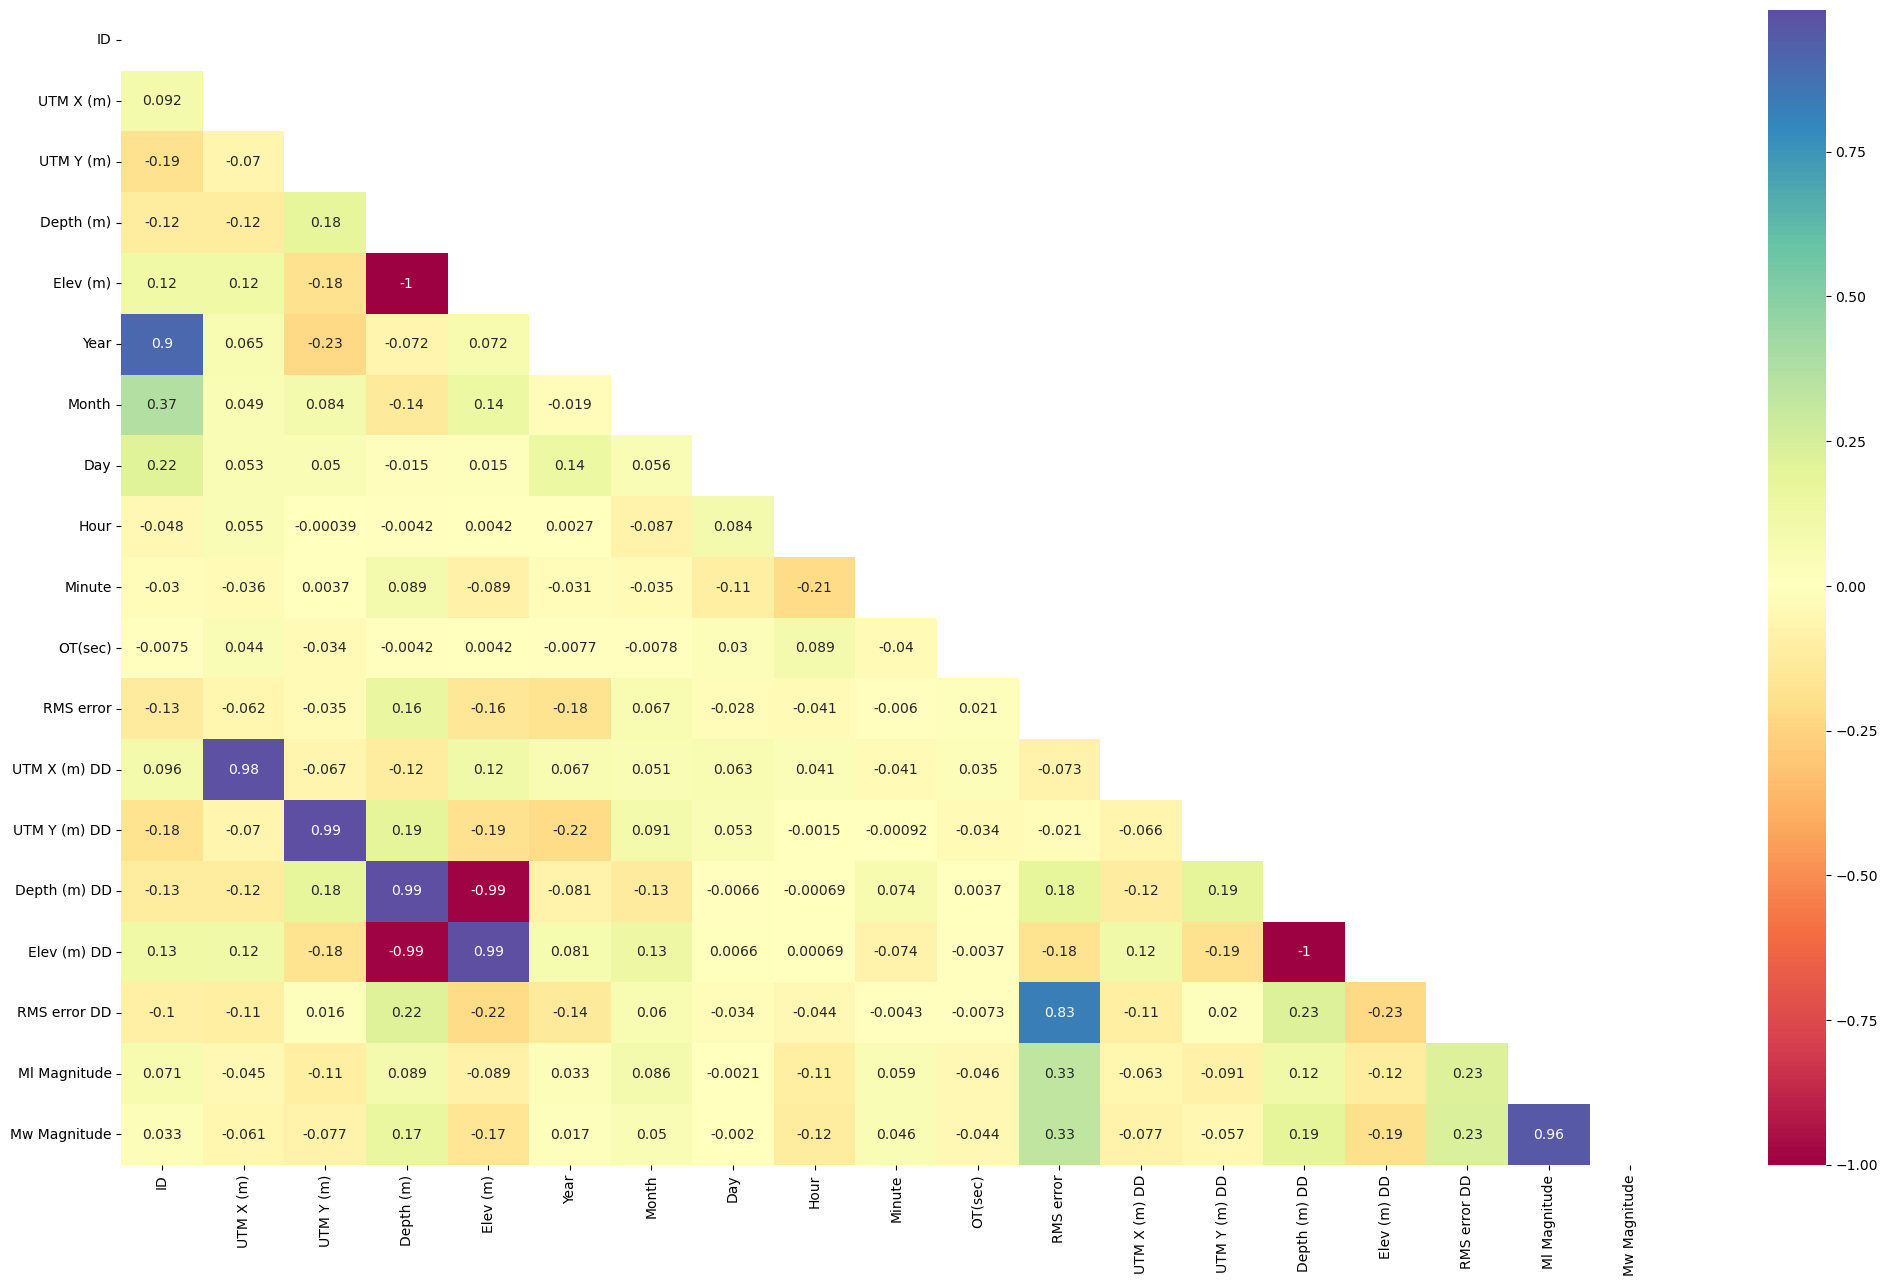

In [21]:
corrmat = df.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(25,15))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

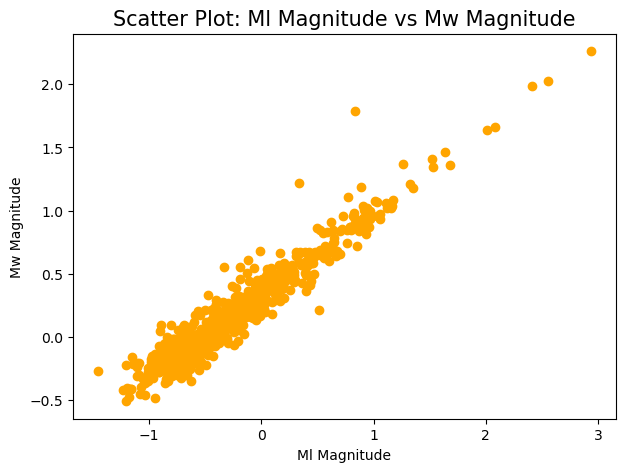

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(df['Ml Magnitude'], df['Mw Magnitude'], color = 'orange')
plt.title('Scatter Plot: Ml Magnitude vs Mw Magnitude', size = 15)
plt.xlabel('Ml Magnitude')
plt.ylabel('Mw Magnitude')
plt.show()

In [23]:
df[['Ml Magnitude', 'Mw Magnitude']].corr()

Ml Magnitude  Mw Magnitude
Ml Magnitude      1.000000      0.959493
Mw Magnitude      0.959493      1.000000

* Berdasarkan korelasi pearson, terlihat adanya korelasi positif dari parameter magnitudo lokal dan momen, seiring meningkatnya lokal magnitude akan berpengaruh pada peningkatan momen magnitude

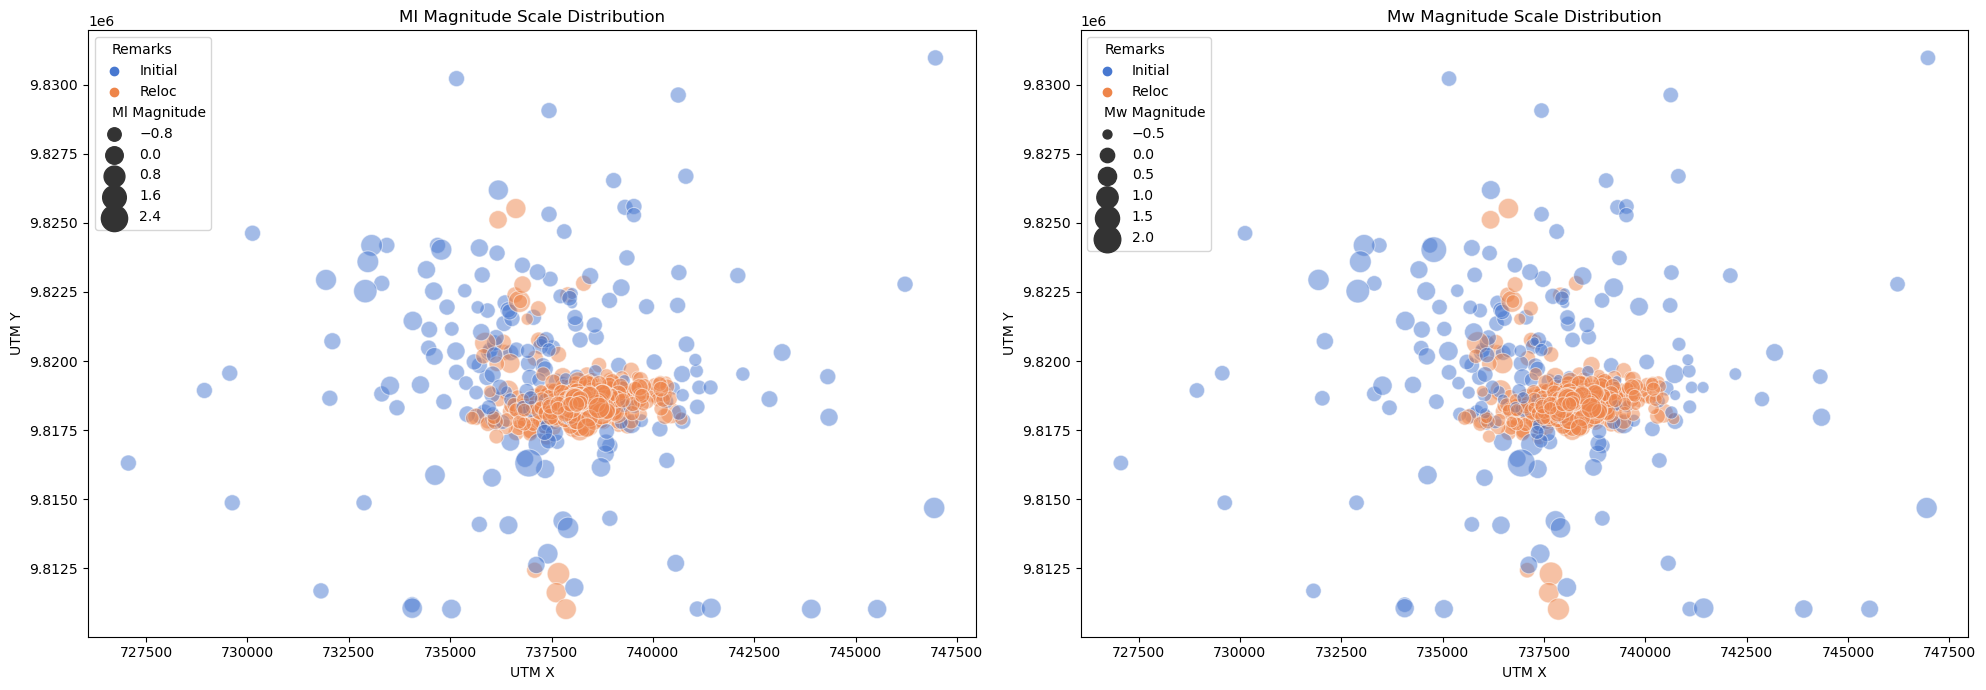

In [24]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot pertama - Relation plot untuk MI Magnitude
sns.scatterplot(x='UTM X (m) DD', y='UTM Y (m) DD', hue='Remarks', size='Ml Magnitude',
                sizes=(40, 400), alpha=.5, palette="muted",
                data=df, ax=axes[0])

axes[0].set_xlabel('UTM X')
axes[0].set_ylabel('UTM Y')
axes[0].set_title('MI Magnitude Scale Distribution')

# Plot kedua - Relation plot untuk Mw Magnitude
sns.scatterplot(x='UTM X (m) DD', y='UTM Y (m) DD', hue='Remarks', size='Mw Magnitude',
                sizes=(40, 400), alpha=.5, palette="muted",
                data=df, ax=axes[1])

axes[1].set_xlabel('UTM X')
axes[1].set_ylabel('UTM Y')
axes[1].set_title('Mw Magnitude Scale Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

* Dari kedua plot lokal dan momen magnitude, terlihat hasil relokasi menggunakan hypoDD lebih terpusat dengan value magnitude lebih besar dari 1.5 berada pada zona cluster event gempa mikro
* Sebagai tambahan informasi mempertimbangkan keberadaan sumur injeksi secara geospasial, event seismic cenderung teridentifikasi di PAD-B yang berdekatan dengan major fault, sehingga event-event seismic bermunculan akibat fault reactivation

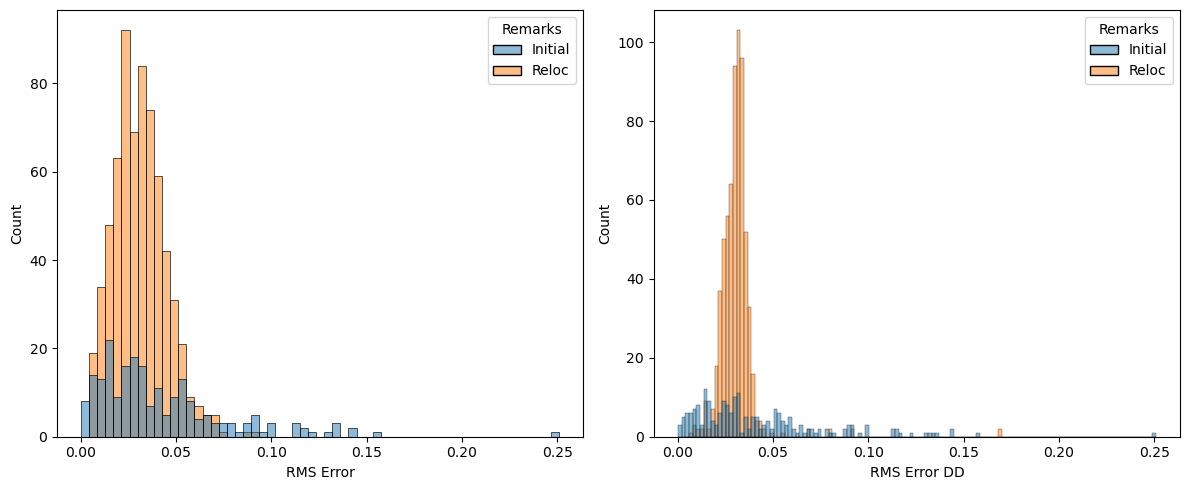

In [25]:
# Mengatur subplot dengan ukuran 2x1
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot pertama
sns.histplot(x='RMS error', hue='Remarks', data=df, ax=axs[0])
axs[0].set_xlabel('RMS Error')
axs[0].set_ylabel('Count')

# Plot kedua
sns.histplot(x='RMS error DD', hue='Remarks', data=df, ax=axs[1])
axs[1].set_xlabel('RMS Error DD')
axs[1].set_ylabel('Count')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

* Dapat terlihat penerapan hypoDD untuk relocation menyebabkan beberapa data yang sebelumnya memiliki RMS error lebih besar mengalami penurunan, akan tetapi pada beberapa kasus terdapat beberapa data yang sebelumnya memiliki RMS error lebih kecil mengalami kenaikan yang tidak begitu signifikan.

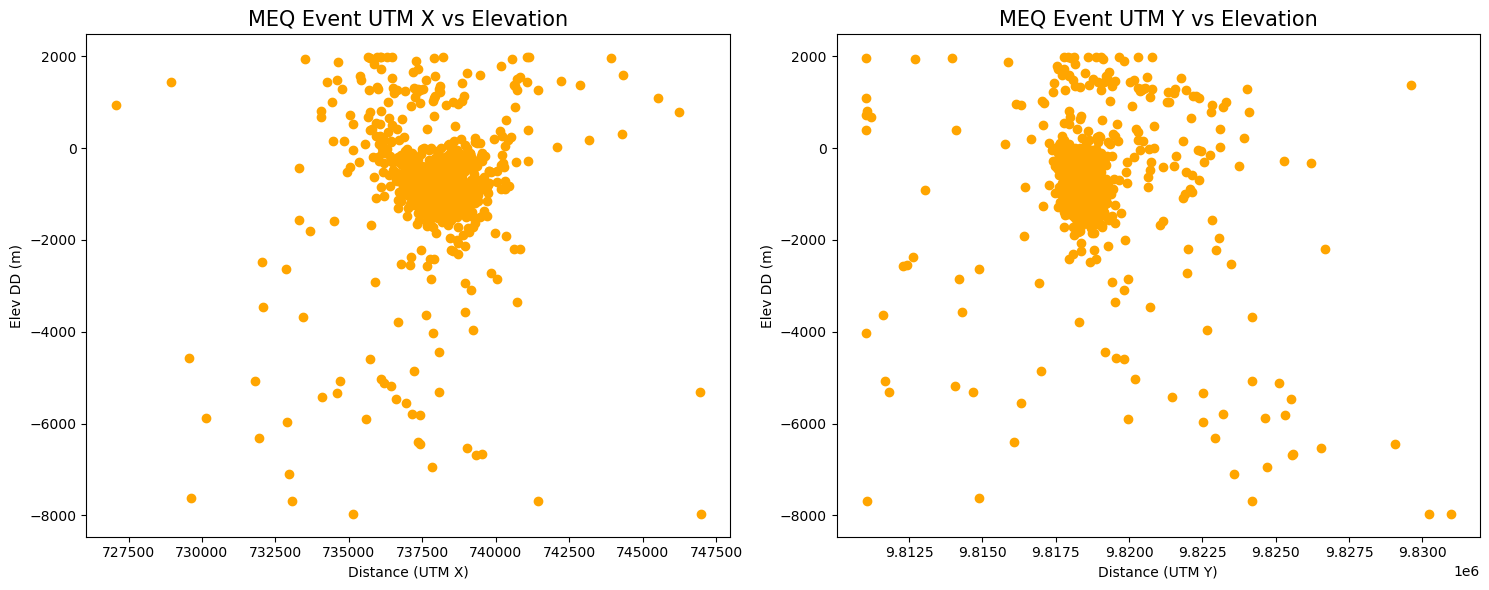

In [26]:
# Membuat subplot dengan ukuran 2x1
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot pertama
axs[0].scatter(df['UTM X (m) DD'], df['Elev (m) DD'], color='orange')
axs[0].set_title('MEQ Event UTM X vs Elevation', size=15)
axs[0].set_xlabel('Distance (UTM X)')
axs[0].set_ylabel('Elev DD (m)')

# Plot kedua
axs[1].scatter(df['UTM Y (m) DD'], df['Elev (m) DD'], color='orange')
axs[1].set_title('MEQ Event UTM Y vs Elevation', size=15)
axs[1].set_xlabel('Distance (UTM Y)')
axs[1].set_ylabel('Elev DD (m)')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [27]:
xarray = df['UTM X (m) DD']
yarray = df['UTM Y (m) DD']
zarray = df['Elev (m) DD']
mw_array = df['Mw Magnitude']

In [28]:
# Create a trace for 3D scatter plot
scatter = go.Scatter3d(
    x=xarray,
    y=yarray,
    z=zarray,
    mode='markers',
    marker=dict(size=5, color=zarray, colorscale='Viridis'),
)

# Create layout for the plot with larger dimensions
layout = go.Layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='UTM X (m) DD'),
        yaxis=dict(title='UTM Y (m) DD'),
        zaxis=dict(title='Elev (m) DD'),
    ),
    width=800,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

# Create the figure and add the scatter trace
fig = go.Figure(data=[scatter], layout=layout)

# Show the interactive plot
fig.show()


# Total Events Calculation Over Time

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            879 non-null    int64         
 1   UTM X (m)     879 non-null    float64       
 2   UTM Y (m)     879 non-null    float64       
 3   Depth (m)     879 non-null    float64       
 4   Elev (m)      879 non-null    float64       
 5   Year          879 non-null    int64         
 6   Month         879 non-null    int64         
 7   Day           879 non-null    int64         
 8   Hour          879 non-null    int64         
 9   Minute        879 non-null    int64         
 10  OT(sec)       879 non-null    float64       
 11  RMS error     879 non-null    float64       
 12  UTM X (m) DD  879 non-null    float64       
 13  UTM Y (m) DD  879 non-null    float64       
 14  Depth (m) DD  879 non-null    float64       
 15  Elev (m) DD   879 non-null    float64   

Pengulangan tanggal pada dataset akan dijadikan perhitungan untuk menghitung total kejadian gempa mikro yang terjadi ditanggal tersebut, kemudian perhitungan total kejadian gempa mikro ini dan kapan terjadinya akan disimpan kedalam file berformat excel (.xlsx) yang bisa digunakan untuk kebutuhan interpretasi data dengan menggabungkannya dengan data subsurface lainnya seperti laju injeksi.

In [30]:
# Contoh hasil value_counts()
value_counts_result = df['date'].value_counts().reset_index()

# Ubah nama kolom
value_counts_result.columns = ['date', 'total_meq_events']

# Buat rentang tanggal lengkap
full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
full_date_df = pd.DataFrame({'date': full_date_range})

# Gabungkan dengan hasil value_counts() dan isi nilai yang hilang dengan 0
result_df = pd.merge(full_date_df, value_counts_result, on='date', how='left').fillna(0)

# Urutkan berdasarkan tanggal
result_df = result_df.sort_values(by='date')

# Simpan ke file Excel
#result_df.to_excel('Total_MEQ_Events.xlsx', index=False)

In [31]:
df2 = pd.read_excel('Total_MEQ_Events.xlsx') 
df2

date  total_meq_events
0    2020-12-13                 1
1    2020-12-14                 0
2    2020-12-15                 0
3    2020-12-16                 0
4    2020-12-17                 0
...         ...               ...
1015 2023-09-24                 0
1016 2023-09-25                 0
1017 2023-09-26                 0
1018 2023-09-27                 0
1019 2023-09-28                57

[1020 rows x 2 columns]

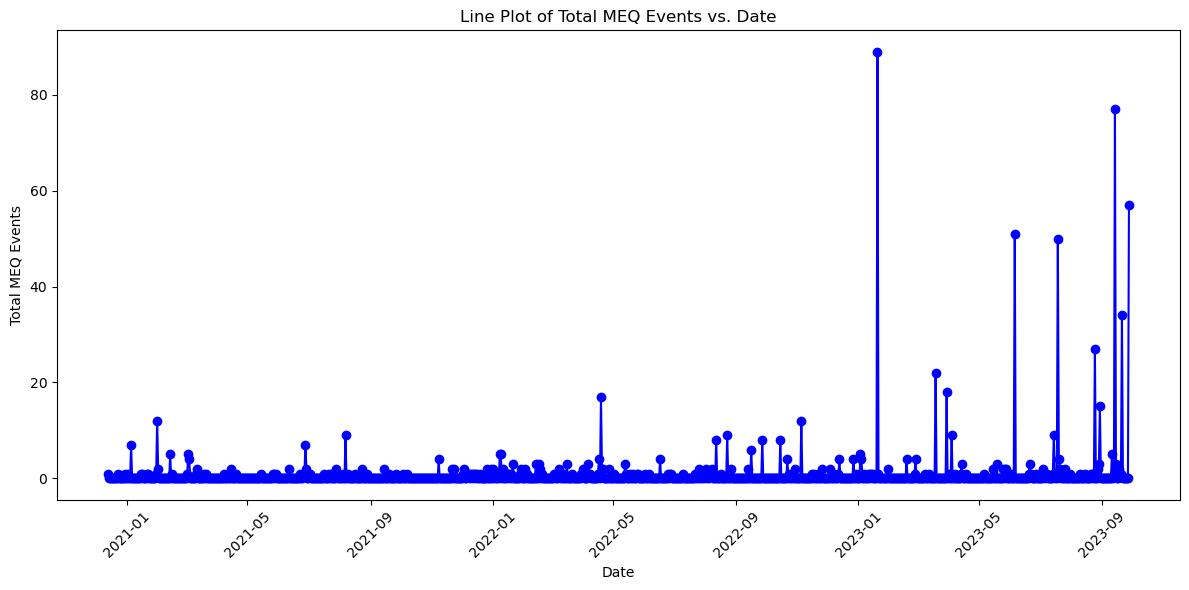

In [32]:
# Plot line plot
plt.figure(figsize=(12, 6))
plt.plot(df2['date'], df2['total_meq_events'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total MEQ Events')
plt.title('Line Plot of Total MEQ Events vs. Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan data, total kejadian gempa mikro mengalami peningkatan di tahun 2023. Pada awal tahun 2023 terjadi perekahan yang terjadi secara signifikan akibat stimulasi dari kegiatan injeksi hingga diatas 80. Kemudian total kejadian gempa mikro kembali mengalami peningkatan pada kuartal 2 dan 3 tahun 2023.  

In [33]:
df2['cum_sum_meq_event'] = df2['total_meq_events'].cumsum()
df2

date  total_meq_events  cum_sum_meq_event
0    2020-12-13                 1                  1
1    2020-12-14                 0                  1
2    2020-12-15                 0                  1
3    2020-12-16                 0                  1
4    2020-12-17                 0                  1
...         ...               ...                ...
1015 2023-09-24                 0                822
1016 2023-09-25                 0                822
1017 2023-09-26                 0                822
1018 2023-09-27                 0                822
1019 2023-09-28                57                879

[1020 rows x 3 columns]

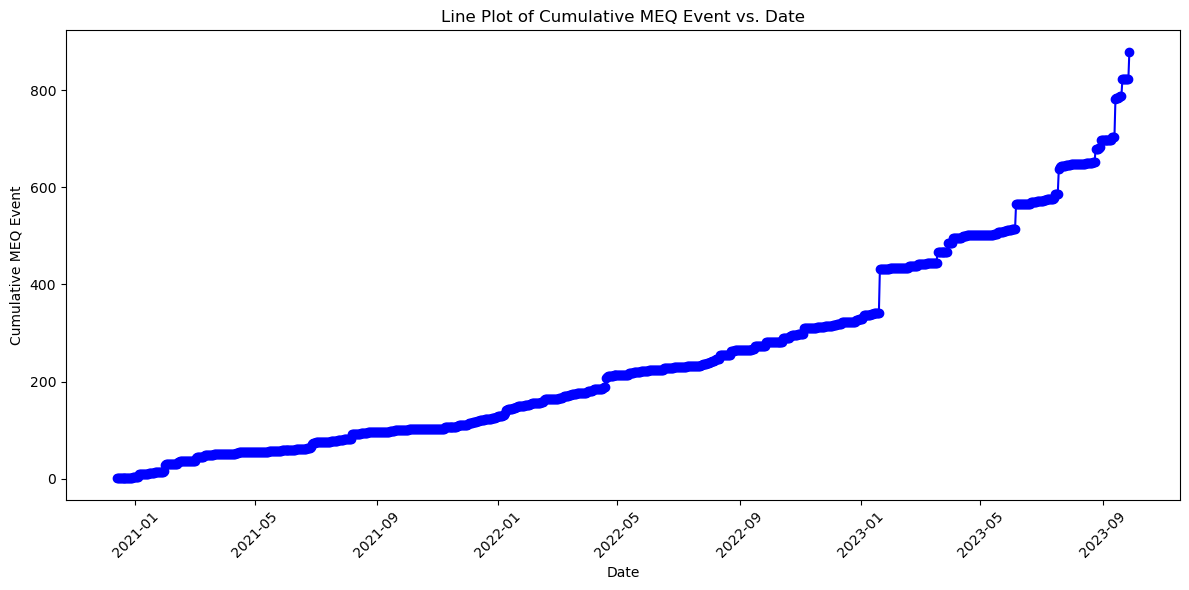

In [34]:
# Plot line plot
plt.figure(figsize=(12, 6))
plt.plot(df2['date'], df2['cum_sum_meq_event'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative MEQ Event')
plt.title('Line Plot of Cumulative MEQ Event vs. Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan plot kumulatif total kejadian gempa mikro, selalu terjadi peningkatan jumlah kejadian gempa mikro dari waktu ke watu dimulai dari akhir 2020 hingga quartal 3 tahun 2023. Peningkatan jumlah kejadian gempa mikro secara signifikan meningkat dimulai pada tahun 2023. 

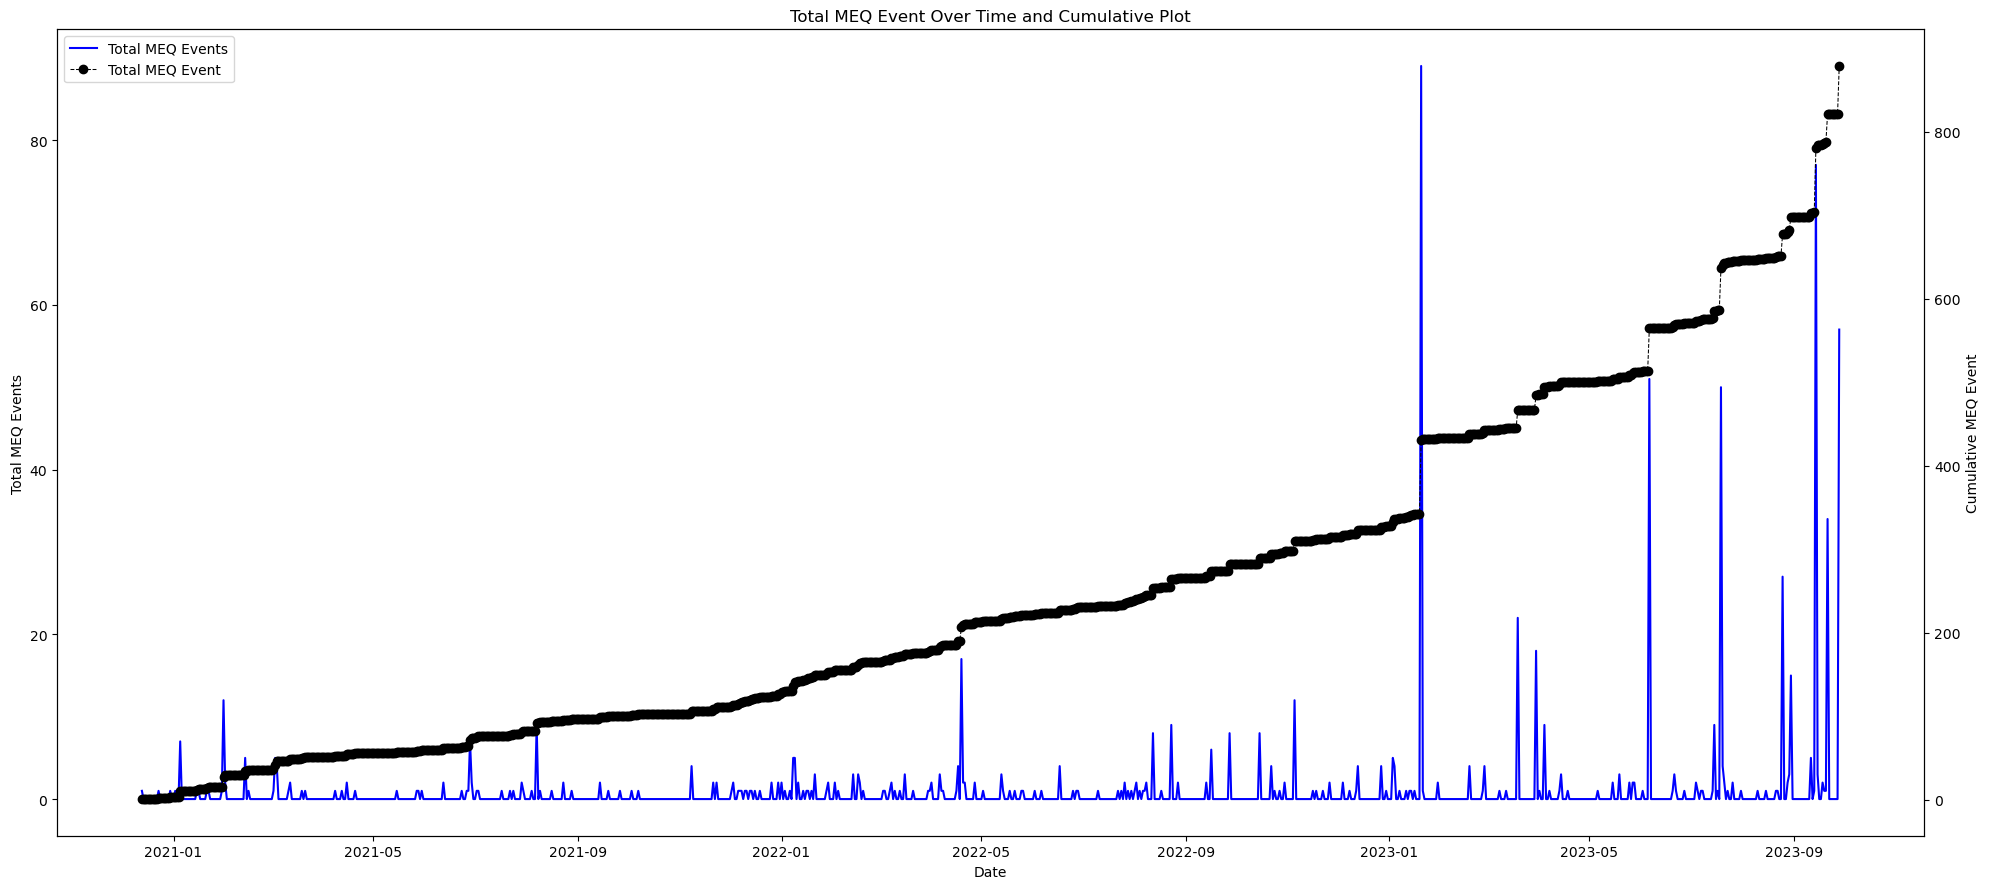

In [35]:
# Create a figure and axis for the first plot
fig, ax1 = plt.subplots(figsize=(20, 9))

# Plot the first set of data (Injection Rate) on the first y-axis (ax1)
ax1.plot(df2['date'], df2['total_meq_events'], color='blue', label='Total MEQ Events')

# Set the label and color for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Total MEQ Events', color='black')

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# Plot the second set of data (Cumulative MEQ Event) on the second y-axis (ax2)
ax2.plot(df2['date'], df2['cum_sum_meq_event'], linewidth=0.75, marker='o', linestyle='--', color='black', label='Total MEQ Event')

# Set the label and color for the second y-axis
ax2.set_ylabel('Cumulative MEQ Event')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Set the title and adjust layout
plt.title('Total MEQ Event Over Time and Cumulative Plot')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Plot diatas merupakan plot total kejadian gempa mikro dan kumulatifnya

In [36]:
# Ekstrak informasi tahun
df2['year'] = df2['date'].dt.year

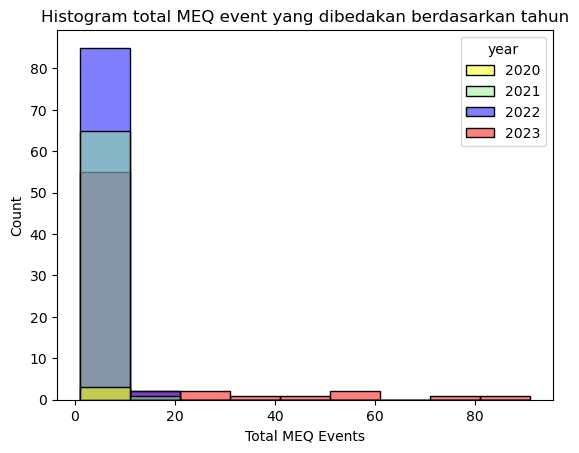

In [37]:
# Filter data
df2 = df2[df2['total_meq_events'] > 0]

# Buat histogram dengan binning = 10
sns.histplot(data=df2, x="total_meq_events", hue="year", binwidth=10, palette=['yellow','lightgreen','blue','red'])
plt.xlabel('Total MEQ Events')
plt.title('Histogram total MEQ event yang dibedakan berdasarkan tahun')
plt.show()

Berdasarkan plot histogram dari total kejadian gempa mikro dengan binning total event sebesar 10, menunjukan 1-10 kejadian gempa mikro dominan dari waktu ke waktu, dan pola ini ditemukan dari tahun 2020-2023. Akan tetapi, 20 - 80 kejadian gempa mikro bisa sampai terjadi dari waktu ke waktu pada tahun 2023.

### Kesimpulan

* Keluaran dari proses data analisis adalah ditemukannya beberapa insight dari katalog MEQ yakni:
    1. Keseluruhan data magnitudo lokal dan momen, memiliki nilai maksimal dibawah 3, hal ini mengindikasikan semua kejadian gempa yang ada pada dataset katalog MEQ merupakan jenis gempa mikro.
    2. Hasil relokasi menggunakan hypoDD menunjukkan bahwa gempa mikro dengan magnitudo lebih besar dari 1,5 cenderung berada pada cluster yang terpusat.
    3. Penerapan hypoDD untuk relocation secara umum dapat meningkatkan akurasi prediksi, dengan penurunan RMS error pada beberapa data yang sebelumnya memiliki RMS error lebih besar. Namun, pada beberapa kasus terdapat beberapa data yang sebelumnya memiliki RMS error lebih kecil mengalami kenaikan yang tidak begitu signifikan.
    4. Terjadi peningkatan jumlah kejadian gempa dari tahun ketahun, dan secara signifikan kejadian gempa mikro meningkat di tahun 2023.
    
* Total kejadian gempa mikro beserta tanggalnya dapat diperoleh dalam format excel (.xlsx) melalui analisis data katalog MEQ menggunakan program dari python, serta dapat digunakan data subsurface lainnya untuk mempermudah interpretasi.